In [26]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict
import re
from statistics import mean

In [27]:
"""Load and process the model predictions from JSONL file."""
records = []
with open("real_model_predictions.jsonl", 'r') as f:
    for line in f:
        record = json.loads(line)
        records.append({
            'description': record['input'].split('Description:')[1].strip(),
            'true_salary': record['true_salary'],
            'predicted_salary': record['predicted_salary'],
            'error': abs(record['true_salary'] - record['predicted_salary']),
            'error_pct': abs(record['true_salary'] - record['predicted_salary']) / record['true_salary'] * 100
        })
df = pd.DataFrame(records)

df.head(50)


,description,true_salary,predicted_salary,error,error_pct
0,About Us:\nAbout Us:TTI (Techtronic Industries...,49493.600,48500.000,993.6,2.007532
1,LHH Recruitment Solutions is looking for a Sof...,145000.000,158210.000,13210.0,9.110345
2,"A Colorado boutique law firm, Childs McCune LL...",142500.000,142500.000,0.0,0.000000
3,"The Opportunity:Our client, an industry-leadin...",120000.000,120000.000,0.0,0.000000
4,Ebenezer offers a robust compensation package ...,38168.000,37440.000,728.0,1.907357
5,ESSENTIAL DUTIES AND RESPONSIBILITIESRelated e...,57200.000,83000.000,25800.0,45.104895
6,Join an amazing team that is consistently reco...,72800.000,60000.000,12800.0,17.582418
7,What You'll Do\n\nPrincipal is looking for a M...,67450.000,67500.000,50.0,0.074129
8,Head of Production Operations (Aerospace exp r...,150000.000,150000.000,0.0,0.000000
9,"To get the best candidate experience, please c...",113925.000,113925.000,0.0,0.000000


In [28]:
def has_explicit_salary(description: str) -> bool:
    """Check if job description contains explicit salary information."""
    salary_patterns = [
        r'\$\d{2,3}(?:,\d{3})*(?:\.\d{2})?',  # Dollar amounts
        r'salary range',
        r'salary:',
        r'compensation range',
        r'pay range',
        r'starting (?:salary|pay)',
        r'annual (?:salary|compensation)',
    ]
    
    description_lower = description.lower()
    return any(re.search(pattern, description_lower) for pattern in salary_patterns)

# Add salary info columns
df['has_salary_info'] = df['description'].apply(has_explicit_salary)

df.head(50)


,description,true_salary,predicted_salary,error,error_pct,has_salary_info
0,About Us:\nAbout Us:TTI (Techtronic Industries...,49493.600,48500.000,993.6,2.007532,True
1,LHH Recruitment Solutions is looking for a Sof...,145000.000,158210.000,13210.0,9.110345,False
2,"A Colorado boutique law firm, Childs McCune LL...",142500.000,142500.000,0.0,0.000000,True
3,"The Opportunity:Our client, an industry-leadin...",120000.000,120000.000,0.0,0.000000,True
4,Ebenezer offers a robust compensation package ...,38168.000,37440.000,728.0,1.907357,True
5,ESSENTIAL DUTIES AND RESPONSIBILITIESRelated e...,57200.000,83000.000,25800.0,45.104895,False
6,Join an amazing team that is consistently reco...,72800.000,60000.000,12800.0,17.582418,False
7,What You'll Do\n\nPrincipal is looking for a M...,67450.000,67500.000,50.0,0.074129,True
8,Head of Production Operations (Aerospace exp r...,150000.000,150000.000,0.0,0.000000,True
9,"To get the best candidate experience, please c...",113925.000,113925.000,0.0,0.000000,True


Performance Analysis by Salary Information Presence
--------------------------------------------------

With Explicit Salary Information:
Number of job postings: 148
Mean Absolute Error: $2,653.68
Median Absolute Error: $0.00
Mean Percentage Error: 2.84%
Median Percentage Error: 0.00%

Without Explicit Salary Information:
Number of job postings: 52
Mean Absolute Error: $23,648.41
Median Absolute Error: $13,005.00
Mean Percentage Error: 23.06%
Median Percentage Error: 17.10%


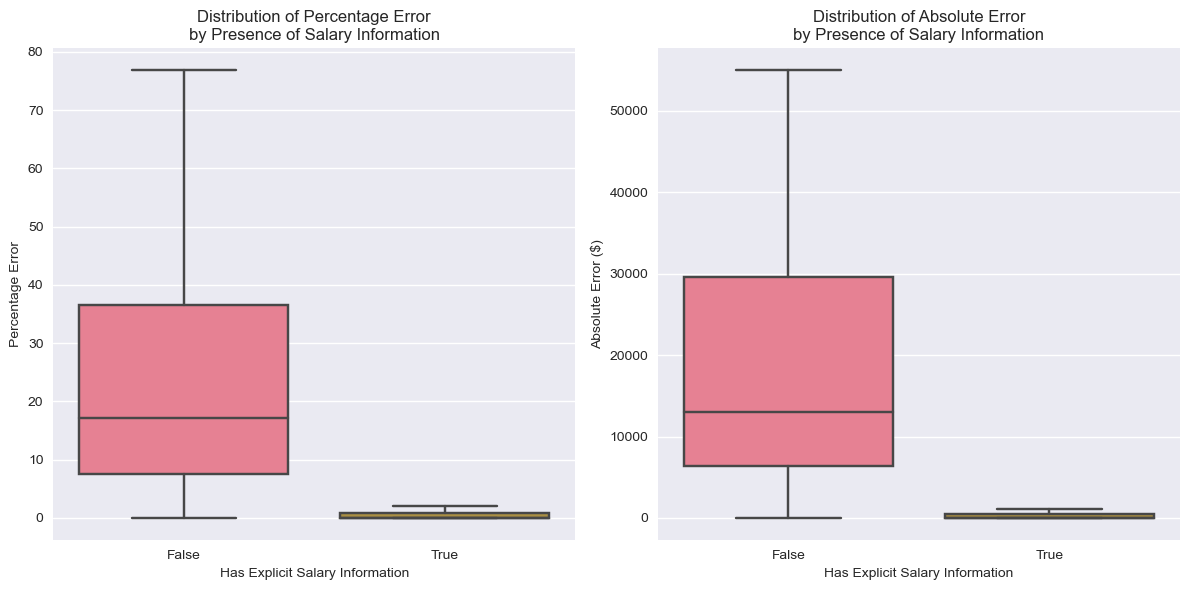


Statistical Analysis
--------------------------------------------------
Mann-Whitney U test p-value: 0.0000
(Testing if errors are significantly lower when salary information is present)


In [30]:
df['has_salary_info'] = df['description'].apply(has_explicit_salary)

# Calculate metrics by salary info presence
print("Performance Analysis by Salary Information Presence")
print("-" * 50)
for has_info in [True, False]:
    subset = df[df['has_salary_info'] == has_info]
    label = "With" if has_info else "Without"
    print(f"\n{label} Explicit Salary Information:")
    print(f"Number of job postings: {len(subset)}")
    print(f"Mean Absolute Error: ${subset['error'].mean():,.2f}")
    print(f"Median Absolute Error: ${subset['error'].median():,.2f}")
    print(f"Mean Percentage Error: {subset['error_pct'].mean():.2f}%")
    print(f"Median Percentage Error: {subset['error_pct'].median():.2f}%")

# Visualize error distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='has_salary_info', y='error_pct',
            showfliers=False)
plt.title('Distribution of Percentage Error\nby Presence of Salary Information')
plt.xlabel('Has Explicit Salary Information')
plt.ylabel('Percentage Error')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='has_salary_info', y='error',
            showfliers=False)
plt.title('Distribution of Absolute Error\nby Presence of Salary Information')
plt.xlabel('Has Explicit Salary Information')
plt.ylabel('Absolute Error ($)')

plt.tight_layout()
plt.show()

# Additional statistical analysis
from scipy import stats
stat, pval = stats.mannwhitneyu(
    df[df['has_salary_info']]['error_pct'],
    df[~df['has_salary_info']]['error_pct'],
    alternative='less'
)
print("\nStatistical Analysis")
print("-" * 50)
print(f"Mann-Whitney U test p-value: {pval:.4f}")
print("(Testing if errors are significantly lower when salary information is present)")
